In [110]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [111]:
h = 0.01         # h : time-step size
n = 10000    # number of time steps for Euler method =>  n = T/dt = 100/h
N = 200           #number of oscillators
r = 0            #order parameter

mu, sigma = 0, 1                         # mean and standard deviation
s = np.random.normal(mu, sigma, N)    # random normal distribution


t = np.random.uniform(0,2*math.pi,N)     #uniform dist of possible theta values
theta_j = t                              #every other choice of theta


sin_sum_dtheta0 = 0
cos_sum = 0
sin_sum = 0
R = []

###

t = time.time()

K = np.arange(0.0, 5.2, 0.2)             #array of coupling constants

for q in range(len(K)):
        
    for l in range(n):  
        
        for osc_idx in range(N):
            
            sin_sum_dtheta_t = 0
            
            for m in range(N):           #interaction
                
                sin_sum_dtheta_t += math.sin(theta_j[m] - theta_j[osc_idx])
                
            theta_dot = s[osc_idx] + (K[q]/N)*(sin_sum_dtheta_t)
                
            theta_j[osc_idx] += theta_dot*h
            
    
    cos_sum = np.sum(np.cos(theta_j))
    sin_sum = np.sum(np.sin(theta_j))

    r = (1/N)*((cos_sum)**2 + (sin_sum)**2)**0.5
    R.append([r])
    
elapsed = time.time() - t
print("This took: ", elapsed, "seconds")

This took:  4557.900356054306 seconds


In [113]:
#Procedure for numerically solving the consistency equation

def g(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)


def f(K,r,x):
     return K*np.cos(x)**2*g(K*r*np.sin(x))


def B(K,r):
    x=np.linspace(-np.pi/2,np.pi/2,1000)
    return np.trapz(f(K,r,x),x)-1
    
def bisection(B,K,a,b,N):
    if B(K,a)*B(K,b)>=0:
        return None
    a_n=a
    b_n=b
    for n in range(1,N+1):
        m_n=(a_n+b_n)/2
        f_m_n=B(K,m_n)
        if B(K,a_n)*f_m_n<0:
            a_n=a_n
            b_n=m_n
        elif B(K,b_n)*f_m_n<0:
            a_n=m_n
            b_n=b_n
        elif f_m_n==0:
            return m_n
        else:
            print("bisection fails")
            return None
    return (a_n+b_n)/2

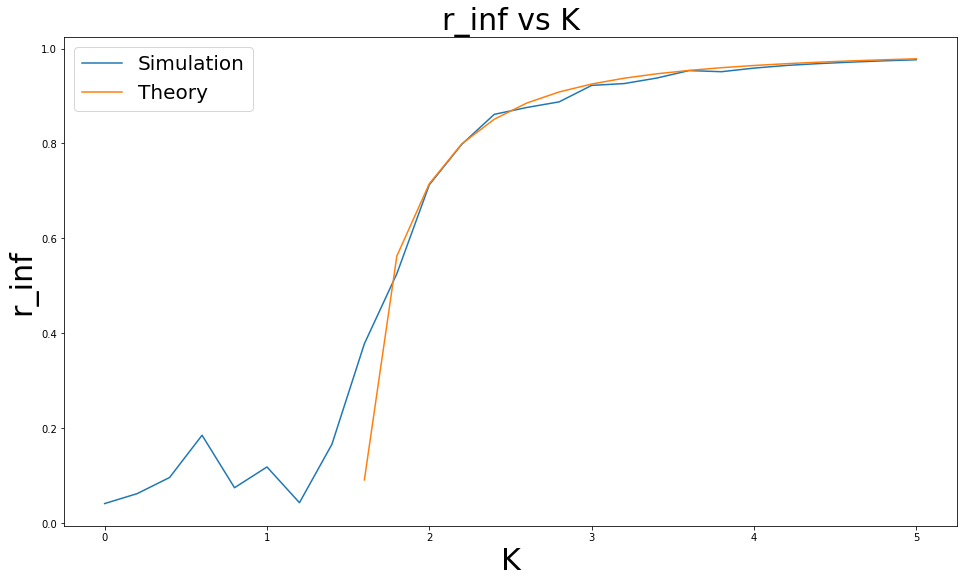

In [116]:
c=[]

for i in range(0,len(K)):
    c.append(bisection(B,K[i],0,1,100))


plt.figure(figsize=[16,9])
plt.plot(K, R)
plt.plot(K,c)
plt.legend(["Simulation", "Theory"], prop={"size":20})
plt.title("r_inf vs K",fontsize=30)
plt.xlabel('K',fontsize = 30)
plt.ylabel('r_inf',fontsize = 30)
plt.show()
